In [2]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/cz/sq8xdzr55730qy6v3g8xdm8r0000gn/T/ipykernel_34990/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def correct_string(line: str, A_before: int) -> (list, int):
    """
    Turns one line of the string into a list with values for all these cols (15)
    'N', 'Z', 'A', 'El', 'Orig', 'Mass Excess (keV)', 'ME Unc',
       'Binding Energy/A (keV)', 'BE/A Unc', 'Beta-decay Type',
       'Beta-decay Energy (keV)', 'BE Unc', 'N Protons',
       'Atomic Mass (micro-u)', 'AM Unc'
    """
    N = int(line[2:9].strip())
    Z = int(line[10:14].strip())
    
    A_test = line[15:19].strip()
    if A_test == "":  # Can be empty
        A = A_before
    else:
        A = int(A_test)
    
    El = line[20:22].strip()
    Orig = line[23:27].strip()
    mass_excess = line[28:41].strip()  # missing convertion for # is str for now
    mass_excess_unc = line[42:52].strip() # missing convertion for # is str for now
    b_energya = line[53:63].strip() # missing convertion for # is str for now
    b_energya_unc = line[63:72].strip() # missing convertion for # is str for now
    b_type = line[72:75].strip()
    b_energy = line[75:86].strip() # missing convertion for # and * is str for now
    b_energy_unc = line[87:95].strip() # missing convertion for # and * is str for now
    n_protons = int(line[96:99].strip())
    a_mass = line[99:112].strip() # missing convertion for # and * is str for now
    am_unc = line[112:].strip() # missing convertion for # and * is str for now
    
    output_values = [
        N, Z, A, El, Orig, mass_excess, mass_excess_unc, b_energya, b_energya_unc,
        b_type, b_energy, b_energy_unc, n_protons, a_mass, am_unc
    ]
    return output_values, A
    

In [4]:
file1 = open('massround.mas20.txt', 'r')
Lines = file1.readlines()

In [5]:
pd_cols = Lines[32].rsplit()[1:]
df = pd.DataFrame(columns=pd_cols)
df = df.rename(columns={"Mass": "Mass Excess (keV)", "Excess": "ME Unc", "Binding": "Binding Energy/A (keV)",
                  "Energy/A": "BE/A Unc", "Beta-decay": "Beta-decay Type",
                   "Energy": "Beta-decay Energy (keV)", "Atomic": "BE Unc"})
df = df.iloc[:,:-1]
df["N Protons"] = None
df["Atomic Mass (micro-u)"] = None
df["AM Unc"] = None

In [6]:
line_number = 34
a_before = 0

for i in range(len(Lines[34:])):
    try:
        value_list, a_temp = correct_string(Lines[line_number + i], a_before)
        a_before = a_temp  # This values sometimes does not change so it is saved between loops
        df.loc[i] = value_list
    except Exception as e:
        print(i, e)

In [11]:
df.loc[df["A"] < 4]

,N,Z,A,El,Orig,Mass Excess (keV),ME Unc,Binding Energy/A (keV),BE/A Unc,Beta-decay Type,Beta-decay Energy (keV),BE Unc,N Protons,Atomic Mass (micro-u),AM Unc
0,1,0,1,n,,8071.3181,0.0004,0.0,0.0,B-,782.347,a,1,008664.9159,0.0005
1,0,1,1,H,,7288.97106,0.00001,0.0,0.0,,*,,1,007825.03190,0.00001
2,1,1,2,H,,13135.72290,0.00002,1112.283,a,,*,,2,014101.77784,0.00002
3,2,1,3,H,,14949.81090,0.00008,2827.265,a,B-,18.592,a,3,016049.28132,0.00008
4,1,2,3,He,,14931.21888,0.00006,2572.680,a,,*,,3,016029.32197,0.00006
5,0,3,3,Li,-pp,28670#,2000#,-2270#,670#,B+,13740#,2000#,3,030780#,2150#


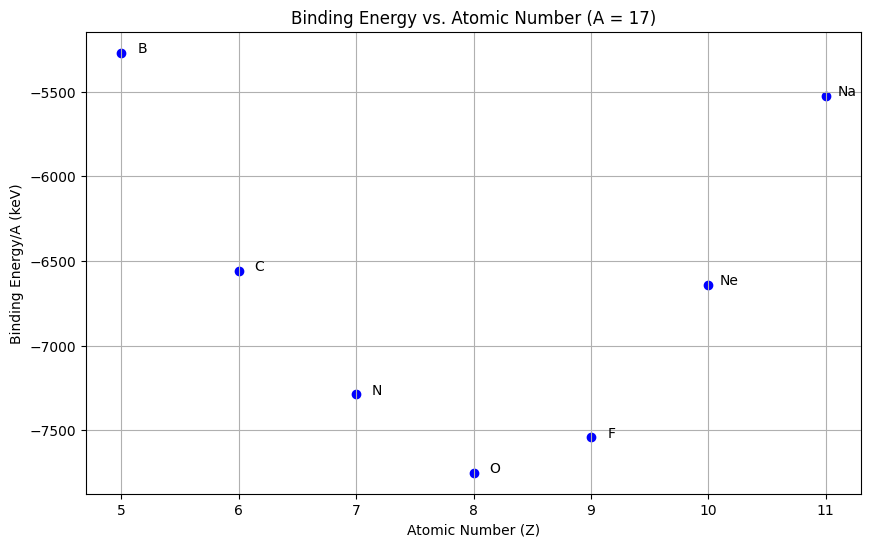

In [18]:
A = 17
values = df.loc[df["A"] == A, ["Z", "Binding Energy/A (keV)", "El"]]
values["Binding Energy/A (keV)"] = values["Binding Energy/A (keV)"].astype(float)

plt.figure(figsize=(10, 6))
# Scatter plot
plt.scatter(values['Z'], -values['Binding Energy/A (keV)'], marker='o', color='blue')

# Adding annotations
for i, txt in zip(values['El'].index, values['El'].values):
    plt.annotate(txt, (values['Z'][i], -values['Binding Energy/A (keV)'][i]), 
                 textcoords="offset points", xytext=(15,0), ha='center')

# Adding labels and title
plt.ylabel('Binding Energy/A (keV)')
plt.xlabel('Atomic Number (Z)')
plt.title(f'Binding Energy vs. Atomic Number (A = {A})')

# Display the plot
plt.grid(":")
plt.show()

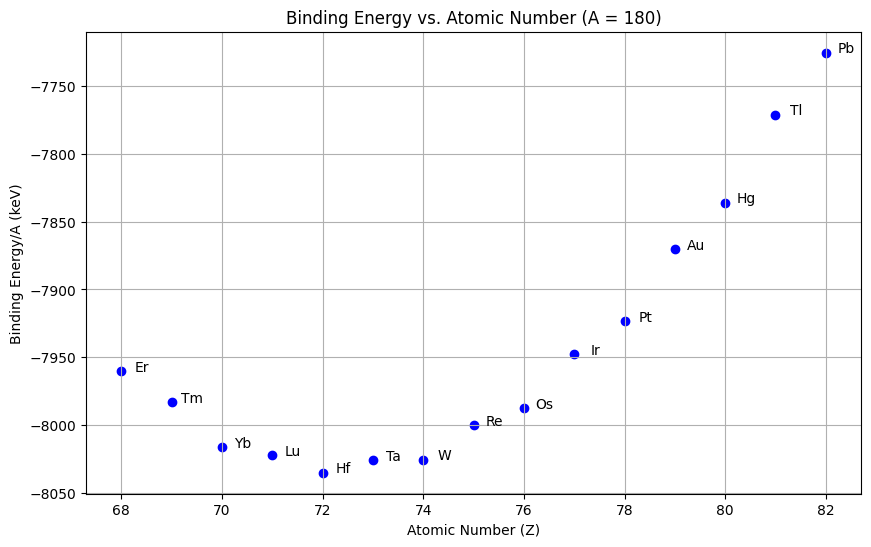

In [17]:
A = 180
values = df.loc[df["A"] == A, ["Z", "Binding Energy/A (keV)", "El"]]
values["Binding Energy/A (keV)"] = values["Binding Energy/A (keV)"].str.replace("#", "").astype(float)

plt.figure(figsize=(10, 6))
# Scatter plot
plt.scatter(values['Z'], -values['Binding Energy/A (keV)'], marker='o', color='blue')

# Adding annotations
for i, txt in zip(values['El'].index, values['El'].values):
    plt.annotate(txt, (values['Z'][i], -values['Binding Energy/A (keV)'][i]), 
                 textcoords="offset points", xytext=(15,0), ha='center')

# Adding labels and title
plt.ylabel('Binding Energy/A (keV)')
plt.xlabel('Atomic Number (Z)')
plt.title(f'Binding Energy vs. Atomic Number (A = {A})')

# Display the plot
plt.grid(":")
plt.show()